<a href="https://colab.research.google.com/github/mohitha15/Leveraging-XGBoost-and-Clinical-Attributes-for-Heart-Disease-Prediction/blob/main/Heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('data.csv')

In [ ]:
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
heart_data.shape

(299, 13)

In [ ]:
heart_data.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


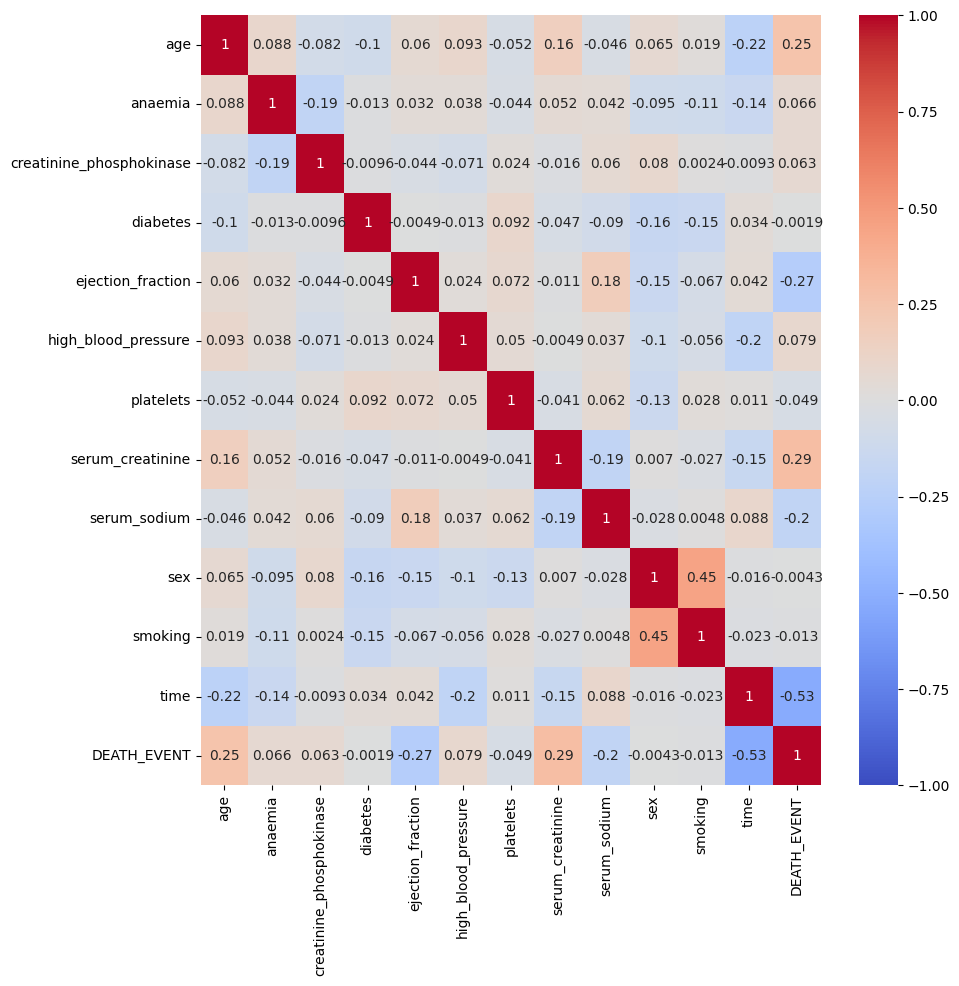

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_data.corr(),vmin=-1,cmap='coolwarm',annot=True);

In [ ]:
labels = ['No Diabetes','Diabetes']
diabetes_yes = heart_data[heart_data['diabetes']==1]
diabetes_no = heart_data[heart_data['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.1)])
fig.update_layout(
    title_text="Analysis on Diabetes")
fig.show()

In [ ]:
fig=px.pie(heart_data,values='diabetes',names='DEATH_EVENT',title='Death Analysis')
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
Feature=['time','ejection_fraction','serum_creatinine']
x=heart_data[Feature]
y=heart_data["DEATH_EVENT"]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_re=LogisticRegression()

In [ ]:
log_re.fit(xtrain,ytrain)
log_re_pred=log_re.predict(xtest)

In [ ]:
log_acc=accuracy_score(ytest,log_re_pred)
print("Logistic Accuracy Score: ","{:.2f}%".format(100*log_acc))

Logistic Accuracy Score:  90.00%


Hybrid Model Accuracy Score:  93.33%
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.93      0.82      0.88        17

    accuracy                           0.93        60
   macro avg       0.93      0.90      0.91        60
weighted avg       0.93      0.93      0.93        60



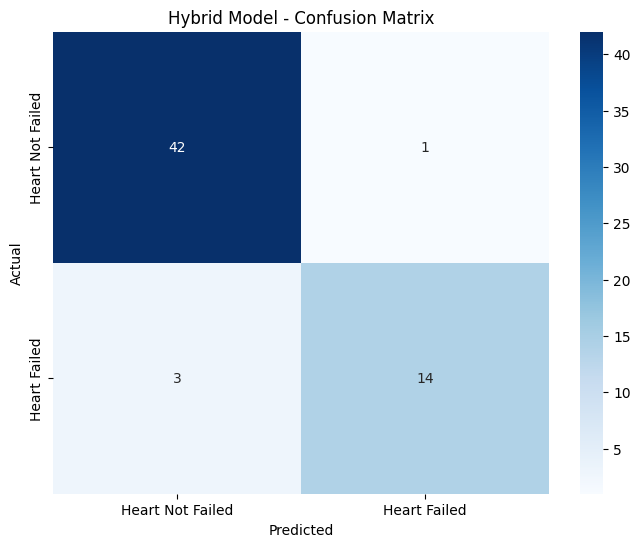

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace with your actual dataset file)
heart_data = pd.read_csv('data.csv')
heart_data.head()
# Specify features and target
features = ['time', 'ejection_fraction', 'serum_creatinine']
X = heart_data[features]
y = heart_data['DEATH_EVENT']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the individual models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(probability=True, random_state=42)  # Enable probability for voting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create a Voting Classifier
hybrid_model = VotingClassifier(estimators=[
    ('rf', rf),
    ('svm', svm),
    ('gb', gb)
], voting='soft')  # Use 'soft' voting for better performance

# Train the hybrid model
hybrid_model.fit(X_train, y_train)

# Make predictions
y_pred = hybrid_model.predict(X_test)

# Evaluate the model
hybrid_accuracy = accuracy_score(y_test, y_pred)
print("Hybrid Model Accuracy Score: ", "{:.2f}%".format(100 * hybrid_accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix for the Hybrid Model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Hybrid Model - Confusion Matrix")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFECV

# Load your dataset

data = pd.read_csv("data.csv")

# Define the feature set (X) and target variable (y)
features = ['time', 'ejection_fraction', 'serum_creatinine','age','anaemia','creatinine_phosphokinase','diabetes','DEATH_EVENT']
X = data[features]
y = data['DEATH_EVENT']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform Recursive Feature Elimination (RFE) with cross-validation
selector = RFECV(estimator=rf, step=1, cv=5)
selector.fit(X_train, y_train)

# Get the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Create a pipeline for preprocessing and model training
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('rf', RandomForestClassifier(random_state=42))  # Random Forest model
])

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__class_weight': ['balanced', None]  # Adjust class weights
}

# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the model on the selected features
random_search.fit(X_train_selected, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: ","{:.2f}%".format(100*accuracy))

# Print classification report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Accuracy Score:  100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        25

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



Optimized Hybrid Model Accuracy:  91.67%
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.93      0.76      0.84        17

    accuracy                           0.92        60
   macro avg       0.92      0.87      0.89        60
weighted avg       0.92      0.92      0.91        60



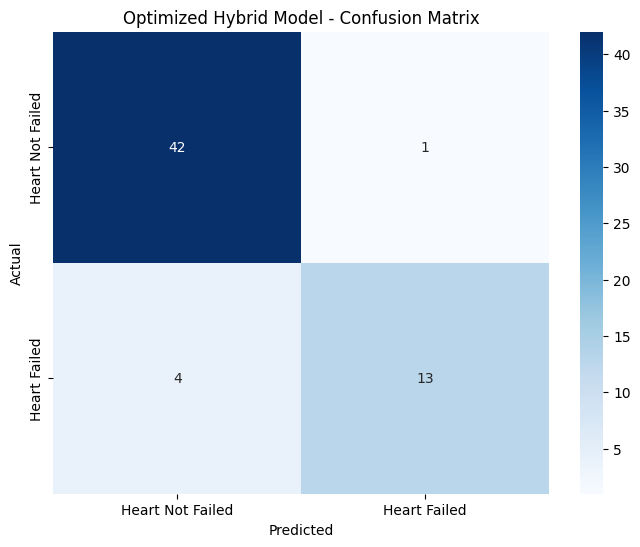

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['time', 'ejection_fraction', 'serum_creatinine']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the individual models
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)  # Enable probability for voting
gb = GradientBoostingClassifier(random_state=42)

# Hyperparameter tuning for RandomForest
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
rf_random = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=5, random_state=42)
rf_random.fit(X_train, y_train)

# Hyperparameter tuning for SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.001, 0.01, 0.1, 1],
}
svm_random = RandomizedSearchCV(svm, svm_params, n_iter=10, cv=5, random_state=42)
svm_random.fit(X_train, y_train)

# Hyperparameter tuning for GradientBoosting
gb_params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}
gb_random = RandomizedSearchCV(gb, gb_params, n_iter=10, cv=5, random_state=42)
gb_random.fit(X_train, y_train)

# Voting Classifier with optimized parameters
hybrid_model = VotingClassifier(estimators=[
    ('rf', rf_random.best_estimator_),
    ('svm', svm_random.best_estimator_),
    ('gb', gb_random.best_estimator_)
], voting='soft')

# Train the hybrid model
hybrid_model.fit(X_train, y_train)

# Make predictions
y_pred = hybrid_model.predict(X_test)

# Evaluate the model
hybrid_accuracy = accuracy_score(y_test, y_pred)
print("Optimized Hybrid Model Accuracy: ", "{:.2f}%".format(100 * hybrid_accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix for the Hybrid Model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Optimized Hybrid Model - Confusion Matrix")
plt.show()


Optimized Hybrid Model Accuracy:  91.67%
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.93      0.76      0.84        17

    accuracy                           0.92        60
   macro avg       0.92      0.87      0.89        60
weighted avg       0.92      0.92      0.91        60



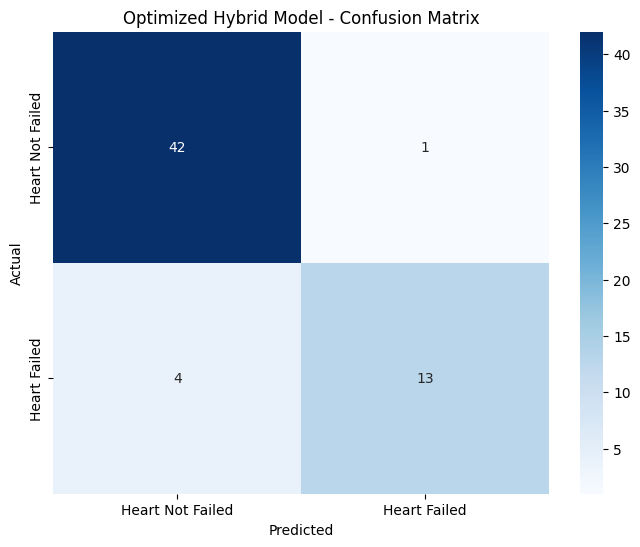

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify more relevant features and target based on domain knowledge
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the individual models
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)  # Enable probability for voting
gb = GradientBoostingClassifier(random_state=42)

# Hyperparameter tuning for RandomForest
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
rf_random = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=5, random_state=42)
rf_random.fit(X_train, y_train)

# Hyperparameter tuning for SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.001, 0.01, 0.1, 1],
}
svm_random = RandomizedSearchCV(svm, svm_params, n_iter=10, cv=5, random_state=42)
svm_random.fit(X_train, y_train)

# Hyperparameter tuning for GradientBoosting
gb_params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}
gb_random = RandomizedSearchCV(gb, gb_params, n_iter=10, cv=5, random_state=42)
gb_random.fit(X_train, y_train)

# Voting Classifier with optimized parameters
hybrid_model = VotingClassifier(estimators=[
    ('rf', rf_random.best_estimator_),
    ('svm', svm_random.best_estimator_),
    ('gb', gb_random.best_estimator_)
], voting='soft')

# Train the hybrid model
hybrid_model.fit(X_train, y_train)

# Make predictions
y_pred = hybrid_model.predict(X_test)

# Evaluate the model
hybrid_accuracy = accuracy_score(y_test, y_pred)
print("Optimized Hybrid Model Accuracy: ", "{:.2f}%".format(100 * hybrid_accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix for the Hybrid Model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Optimized Hybrid Model - Confusion Matrix")
plt.show()


Optimized Hybrid Model Accuracy:  91.67%
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.93      0.76      0.84        17

    accuracy                           0.92        60
   macro avg       0.92      0.87      0.89        60
weighted avg       0.92      0.92      0.91        60



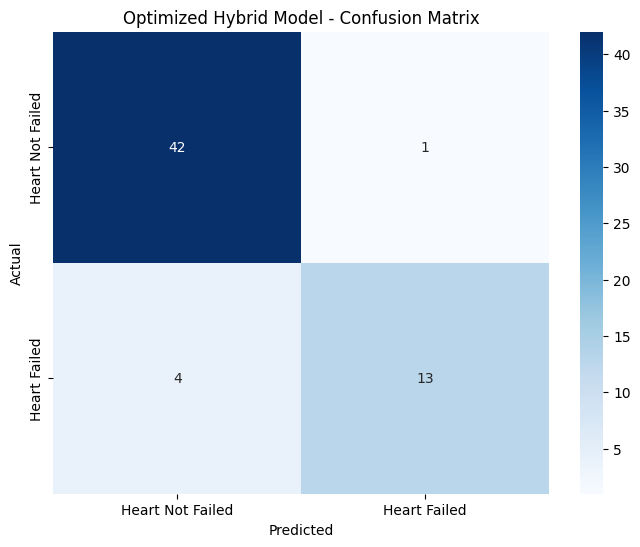

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify more relevant features and target based on domain knowledge
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the individual models
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)  # Enable probability for voting
gb = GradientBoostingClassifier(random_state=42)

# Define parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1],
}

gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
}

# Hyperparameter tuning using GridSearchCV for RandomForest
rf_grid = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Hyperparameter tuning using GridSearchCV for SVM
svm_grid = GridSearchCV(svm, svm_params, cv=5, n_jobs=-1)
svm_grid.fit(X_train, y_train)

# Hyperparameter tuning using GridSearchCV for GradientBoosting
gb_grid = GridSearchCV(gb, gb_params, cv=5, n_jobs=-1)
gb_grid.fit(X_train, y_train)

# Voting Classifier with optimized parameters
hybrid_model = VotingClassifier(estimators=[
    ('rf', rf_grid.best_estimator_),
    ('svm', svm_grid.best_estimator_),
    ('gb', gb_grid.best_estimator_)
], voting='soft')

# Train the hybrid model
hybrid_model.fit(X_train, y_train)

# Make predictions
y_pred = hybrid_model.predict(X_test)

# Evaluate the model
hybrid_accuracy = accuracy_score(y_test, y_pred)
print("Optimized Hybrid Model Accuracy: ", "{:.2f}%".format(100 * hybrid_accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix for the Hybrid Model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Optimized Hybrid Model - Confusion Matrix")
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Optimized Random Forest Model Accuracy:  95.00%
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.82      0.90        17

    accuracy                           0.95        60
   macro avg       0.97      0.91      0.93        60
weighted avg       0.95      0.95      0.95        60



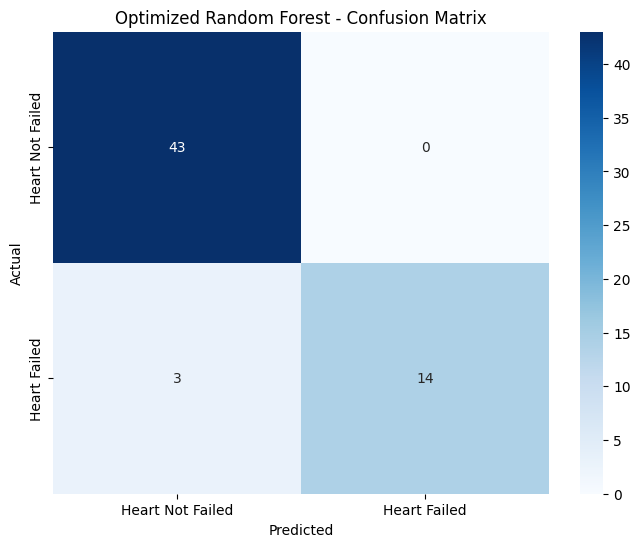

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Use GridSearchCV for hyperparameter tuning
rf_grid = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=2)
rf_grid.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_rf = rf_grid.best_estimator_

# Train the RandomForest model with the best parameters
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
print("Optimized Random Forest Model Accuracy: ", "{:.2f}%".format(100 * rf_accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix for the Random Forest Model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Optimized Random Forest - Confusion Matrix")
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:04:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:14:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:14:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:14:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:14:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:14:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacked Model Accuracy:  93.33%
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96        43
           1       1.00      0.76      0.87        17

    accuracy                           0.93        60
   macro avg       0.96      0.88      0.91        60
weighted avg       0.94      0.93      0.93        60



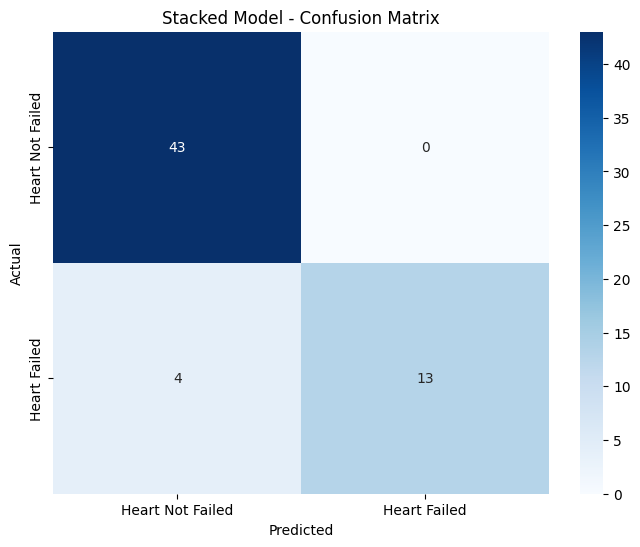

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Define hyperparameters for XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Train the models using a StackingClassifier
estimators = [
    ('rf', GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=2)),
    ('xgb', GridSearchCV(xgb, xgb_params, cv=5, n_jobs=-1, verbose=2))
]

# Use Logistic Regression as the meta-classifier
stacked_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the Stacking Classifier
stacked_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacked_clf.predict(X_test)

# Evaluate the Stacked Model
stacked_accuracy = accuracy_score(y_test, y_pred)
print("Stacked Model Accuracy: ", "{:.2f}%".format(100 * stacked_accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix for the Stacked Model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Stacked Model - Confusion Matrix")
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Optimized Random Forest Model Accuracy:  91.46%
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.89      0.95      0.92        43

    accuracy                           0.91        82
   macro avg       0.92      0.91      0.91        82
weighted avg       0.92      0.91      0.91        82



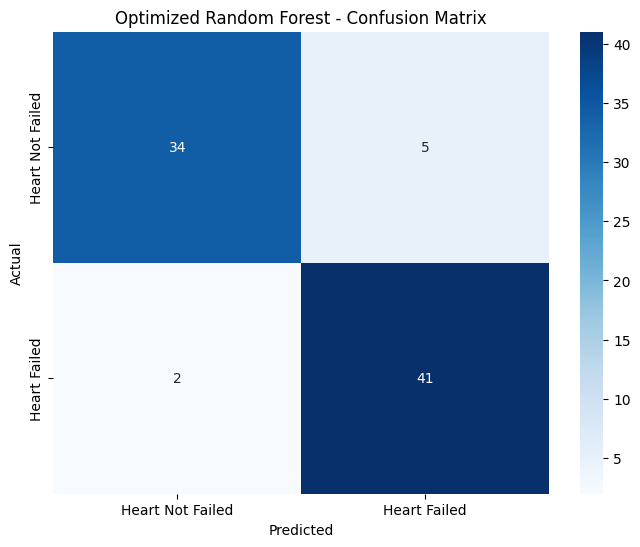

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:10:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:10:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Optimized XGBoost Model Accuracy:  90.24%
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.92      0.87      0.89        39
           1       0.89      0.93      0.91        43

    accuracy                           0.90        82
   macro avg       0.90      0.90      0.90        82
weighted avg       0.90      0.90      0.90        82



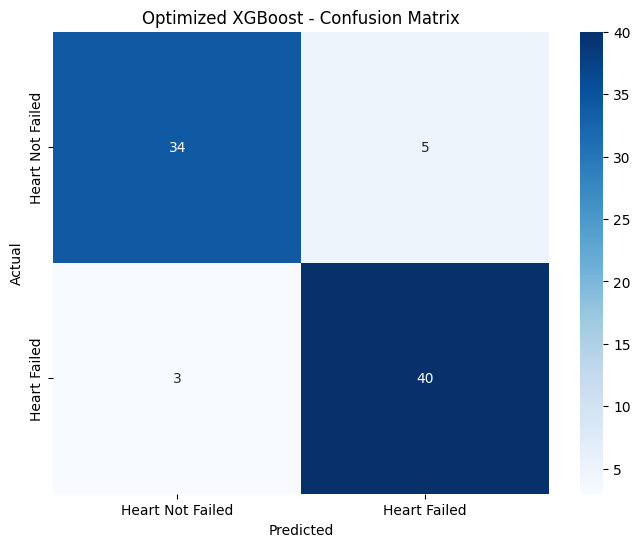

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # For handling class imbalance
import xgboost as xgb  # For XGBoost classifier

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=2)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Polynomial Features for higher order interactions (optional step)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# RandomForestClassifier with GridSearchCV (including poly features)
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Use GridSearchCV for hyperparameter tuning with StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=skf, n_jobs=-1, verbose=2)
rf_grid.fit(X_train_poly, y_train)

# Get the best model after GridSearchCV
best_rf = rf_grid.best_estimator_

# Train the RandomForest model with the best parameters
best_rf.fit(X_train_poly, y_train)

# Make predictions with RandomForest
y_pred_rf = best_rf.predict(X_test_poly)

# Evaluate RandomForest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Optimized Random Forest Model Accuracy: ", "{:.2f}%".format(100 * rf_accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix for the Random Forest Model
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Optimized Random Forest - Confusion Matrix")
plt.show()

# XGBoost model for comparison
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# XGBoost hyperparameters for GridSearchCV
xgb_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# XGBoost GridSearchCV
xgb_grid = GridSearchCV(xgb_clf, xgb_params, cv=skf, n_jobs=-1, verbose=2)
xgb_grid.fit(X_train_poly, y_train)

# Get the best XGBoost model
best_xgb = xgb_grid.best_estimator_

# Train the XGBoost model
best_xgb.fit(X_train_poly, y_train)

# Make predictions with XGBoost
y_pred_xgb = best_xgb.predict(X_test_poly)

# Evaluate XGBoost model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("Optimized XGBoost Model Accuracy: ", "{:.2f}%".format(100 * xgb_accuracy))
print("Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix for the XGBoost Model
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Optimized XGBoost - Confusion Matrix")
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE for data balancing
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
rf_params = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2']  # Added max_features for better tuning
}

# Use GridSearchCV for hyperparameter tuning
rf_grid = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_rf = rf_grid.best_estimator_

# Train the RandomForest model with the best parameters
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
print("Optimized Random Forest Model Accuracy: ", "{:.2f}%".format(100 * rf_accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix for the Random Forest Model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Optimized Random Forest - Confusion Matrix")
plt.show()


Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Optimized XGBoost Model Accuracy:  88.33%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        41
           1       0.83      0.79      0.81        19

    accuracy                           0.88        60
   macro avg       0.87      0.86      0.86        60
weighted avg       0.88      0.88      0.88        60



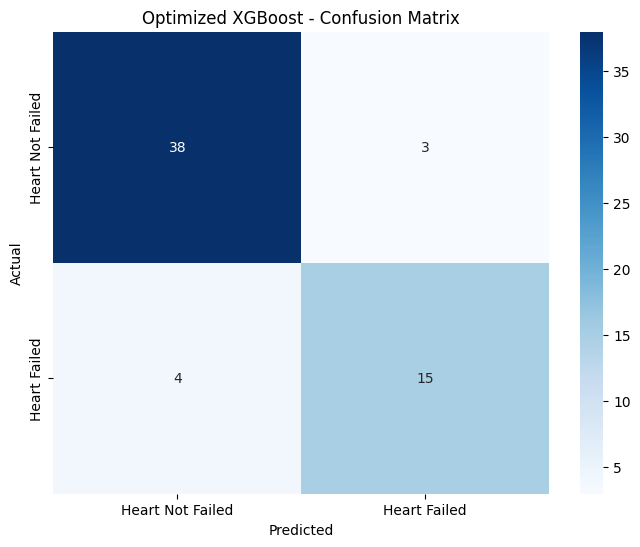

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize XGBClassifier for better performance
xgb = XGBClassifier(random_state=42)

# Define parameter grid for RandomizedSearchCV for XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

# RandomizedSearchCV for hyperparameter tuning
xgb_random = RandomizedSearchCV(xgb, xgb_params, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)
xgb_random.fit(X_train, y_train)

# Get the best XGBoost model after RandomizedSearchCV
best_xgb = xgb_random.best_estimator_

# Train the XGBoost model with the best parameters
best_xgb.fit(X_train, y_train)

# Make predictions
y_pred = best_xgb.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, y_pred)
print("Optimized XGBoost Model Accuracy: ", "{:.2f}%".format(100 * xgb_accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix for the XGBoost Model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Optimized XGBoost - Confusion Matrix")
plt.show()


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Cross-Validation Accuracy: 87.98%
Stacking Classifier Model Accuracy:  88.33%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        41
           1       0.83      0.79      0.81        19

    accuracy                           0.88        60
   macro avg       0.87      0.86      0.86        60
weighted avg       0.88      0.88      0.88        60



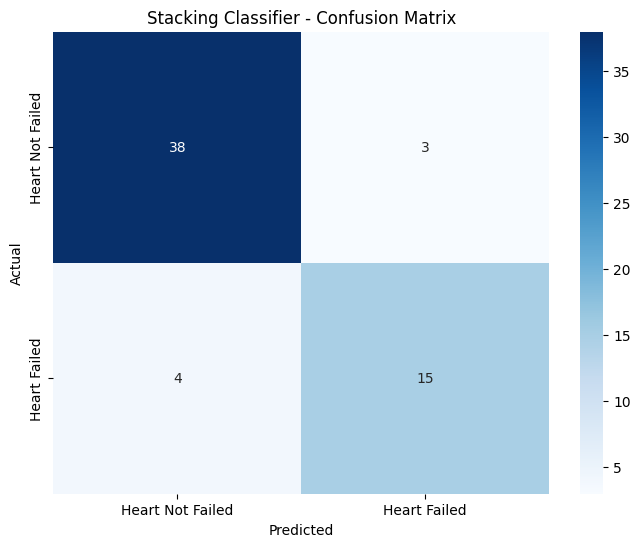

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models for Stacking Classifier
xgb = XGBClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Define parameter grid for RandomizedSearchCV for XGBoost
xgb_params = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.001, 0.01, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5]
}

# RandomizedSearchCV for hyperparameter tuning
xgb_random = RandomizedSearchCV(xgb, xgb_params, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)
xgb_random.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb = xgb_random.best_estimator_

# Stacking Classifier (XGBoost + RandomForest, meta-model: Logistic Regression)
stacking_model = StackingClassifier(
    estimators=[('xgb', best_xgb), ('rf', rf)],
    final_estimator=LogisticRegression(),
    cv=5
)

# Train the Stacking Classifier
stacking_model.fit(X_train, y_train)

# Cross-validate the Stacking Classifier
cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

# Make predictions on the test set
y_pred = stacking_model.predict(X_test)

# Evaluate the Stacking Classifier
stacking_accuracy = accuracy_score(y_test, y_pred)
print("Stacking Classifier Model Accuracy: ", "{:.2f}%".format(100 * stacking_accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix for the Stacking Classifier
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Stacking Classifier - Confusion Matrix")
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the base estimator for AdaBoost (Decision Tree)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost Classifier
ada = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Define the parameter grid for AdaBoost
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}

# Use GridSearchCV for hyperparameter tuning
ada_grid = GridSearchCV(ada, ada_params, cv=5, n_jobs=-1, verbose=2)
ada_grid.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_ada = ada_grid.best_estimator_

# Train the AdaBoost model with the best parameters
best_ada.fit(X_train, y_train)

# Make predictions
y_pred = best_ada.predict(X_test)

# Evaluate the model
ada_accuracy = accuracy_score(y_test, y_pred)
print("Optimized AdaBoost Model Accuracy: ", "{:.2f}%".format(100 * ada_accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix for the AdaBoost Model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Optimized AdaBoost - Confusion Matrix")
plt.show()

TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

1.5.2
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Optimized AdaBoost Model Accuracy:  78.33%
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.67      0.63      0.65        19

    accuracy                           0.78        60
   macro avg       0.75      0.74      0.75        60
weighted avg       0.78      0.78      0.78        60



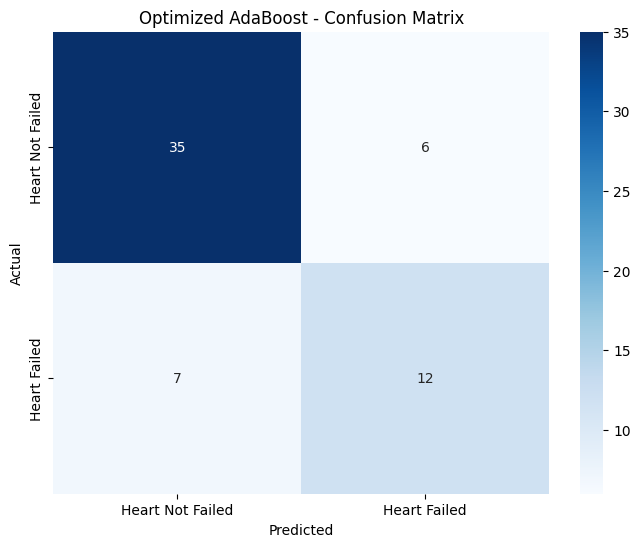

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the base estimator for AdaBoost (Decision Tree)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Check scikit-learn version
import sklearn
print(sklearn.__version__)

# If the version is less than 0.14 then upgrade scikit-learn
# !pip install --upgrade scikit-learn

# Initialize AdaBoost Classifier
ada = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Define the parameter grid for AdaBoost
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}

# Use GridSearchCV for hyperparameter tuning
ada_grid = GridSearchCV(ada, ada_params, cv=5, n_jobs=-1, verbose=2)
ada_grid.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_ada = ada_grid.best_estimator_

# Train the AdaBoost model with the best parameters
best_ada.fit(X_train, y_train)

# Make predictions
y_pred = best_ada.predict(X_test)

# Evaluate the model
ada_accuracy = accuracy_score(y_test, y_pred)
print("Optimized AdaBoost Model Accuracy: ", "{:.2f}%".format(100 * ada_accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix for the AdaBoost Model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Optimized AdaBoost - Confusion Matrix")
plt.show()

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Optimized AdaBoost Model Accuracy:  78.33%
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.67      0.63      0.65        19

    accuracy                           0.78        60
   macro avg       0.75      0.74      0.75        60
weighted avg       0.78      0.78      0.78        60



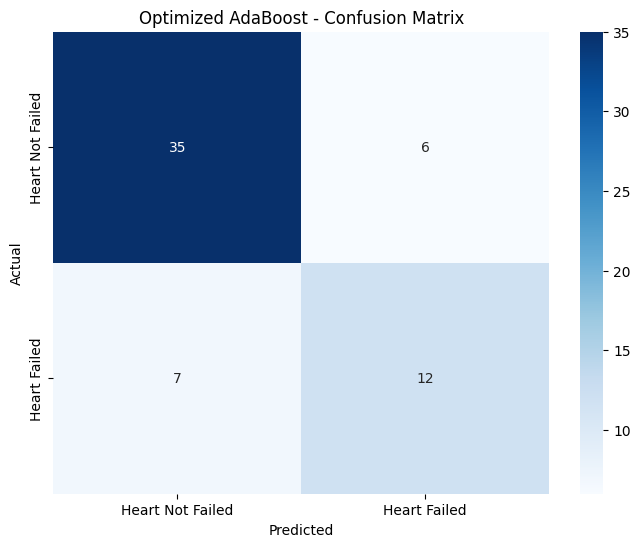

Gradient Boosting Model Accuracy:  86.67%
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        41
           1       0.79      0.79      0.79        19

    accuracy                           0.87        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.87      0.87      0.87        60



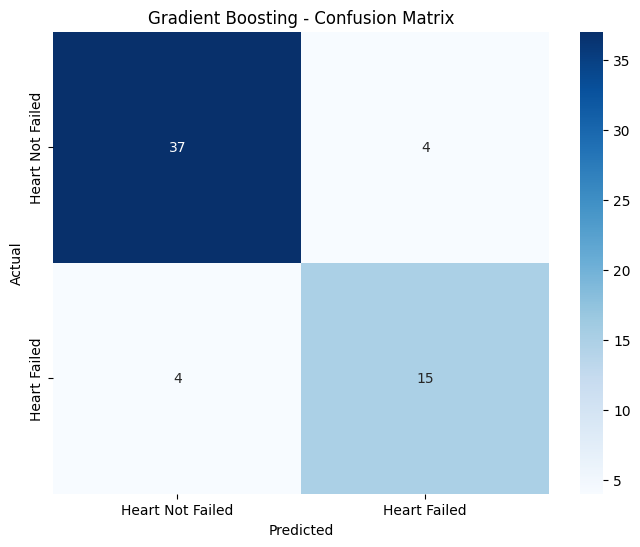

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize base estimator for AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost Classifier
# Initialize AdaBoost Classifier
ada = AdaBoostClassifier(estimator=base_estimator)

# Define the parameter grid for AdaBoost
ada_params = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.5, 1, 1.5]
}

# Use GridSearchCV for hyperparameter tuning
ada_grid = GridSearchCV(ada, ada_params, cv=5, n_jobs=-1, verbose=2)
ada_grid.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_ada = ada_grid.best_estimator_

# Train the AdaBoost model with the best parameters
best_ada.fit(X_train, y_train)

# Make predictions
y_pred = best_ada.predict(X_test)

# Evaluate the model
ada_accuracy = accuracy_score(y_test, y_pred)
print("Optimized AdaBoost Model Accuracy: ", "{:.2f}%".format(100 * ada_accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix for the AdaBoost Model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Optimized AdaBoost - Confusion Matrix")
plt.show()

# Experiment with Gradient Boosting Classifier as well
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Model Accuracy: ", "{:.2f}%".format(100 * gb_accuracy))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

# Confusion Matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 162, number of negative: 162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 425
[LightGBM] [Info] Number of data points in the train set: 324, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

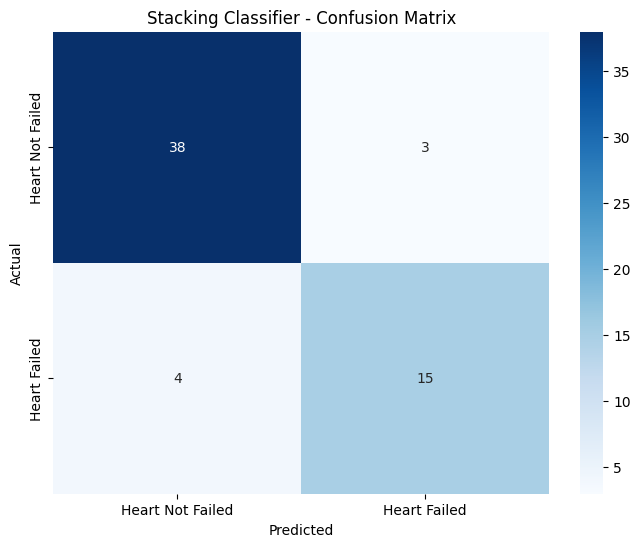

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models for Stacking Classifier
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)
catboost = CatBoostClassifier(random_state=42, verbose=0)

# Stacking Classifier (CatBoost, LightGBM, XGBoost, meta-model: Logistic Regression)
stacking_model = StackingClassifier(
    estimators=[('xgb', xgb), ('lgbm', lgbm), ('catboost', catboost)],
    final_estimator=LogisticRegression(),
    cv=5
)

# Train the Stacking Classifier
stacking_model.fit(X_train, y_train)

# Cross-validate the Stacking Classifier
cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

# Make predictions on the test set
y_pred = stacking_model.predict(X_test)

# Evaluate the Stacking Classifier
stacking_accuracy = accuracy_score(y_test, y_pred)
print("Stacking Classifier Model Accuracy: ", "{:.2f}%".format(100 * stacking_accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix for the Stacking Classifier
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Stacking Classifier - Confusion Matrix")
plt.show()


1.5.2
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Optimized AdaBoost Model Accuracy:  78.33%
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.67      0.63      0.65        19

    accuracy                           0.78        60
   macro avg       0.75      0.74      0.75        60
weighted avg       0.78      0.78      0.78        60



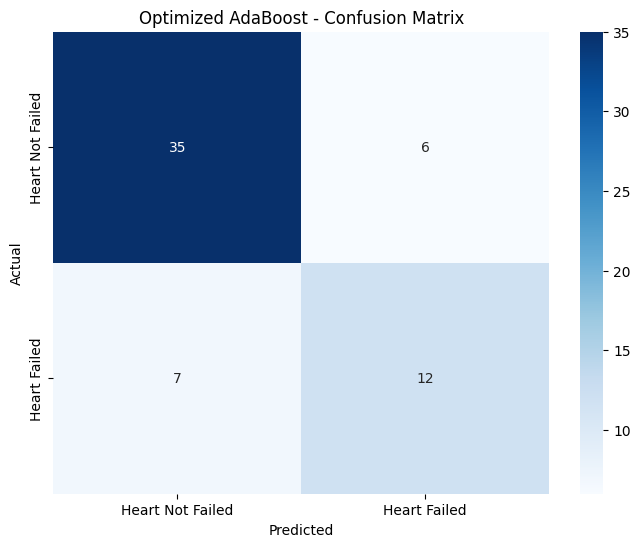

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the base estimator for AdaBoost (Decision Tree)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Check scikit-learn version
import sklearn
print(sklearn.__version__)

# If the version is less than 0.14 then upgrade scikit-learn
# !pip install --upgrade scikit-learn

# Initialize AdaBoost Classifier
ada = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Define the parameter grid for AdaBoost
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}

# Use GridSearchCV for hyperparameter tuning
ada_grid = GridSearchCV(ada, ada_params, cv=5, n_jobs=-1, verbose=2)
ada_grid.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_ada = ada_grid.best_estimator_

# Train the AdaBoost model with the best parameters
best_ada.fit(X_train, y_train)

# Make predictions
y_pred = best_ada.predict(X_test)

# Evaluate the model
ada_accuracy = accuracy_score(y_test, y_pred)
print("Optimized AdaBoost Model Accuracy: ", "{:.2f}%".format(100 * ada_accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix for the AdaBoost Model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Optimized AdaBoost - Confusion Matrix")
plt.show()

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Optimized AdaBoost Model Accuracy:  78.33%
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.67      0.63      0.65        19

    accuracy                           0.78        60
   macro avg       0.75      0.74      0.75        60
weighted avg       0.78      0.78      0.78        60



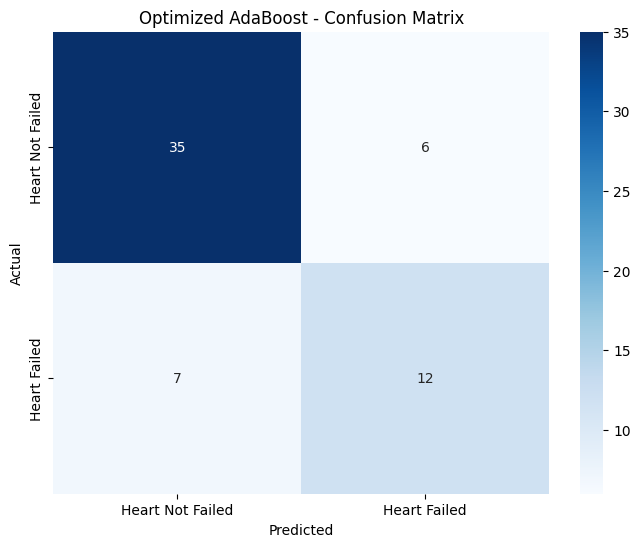

Gradient Boosting Model Accuracy:  86.67%
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        41
           1       0.79      0.79      0.79        19

    accuracy                           0.87        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.87      0.87      0.87        60



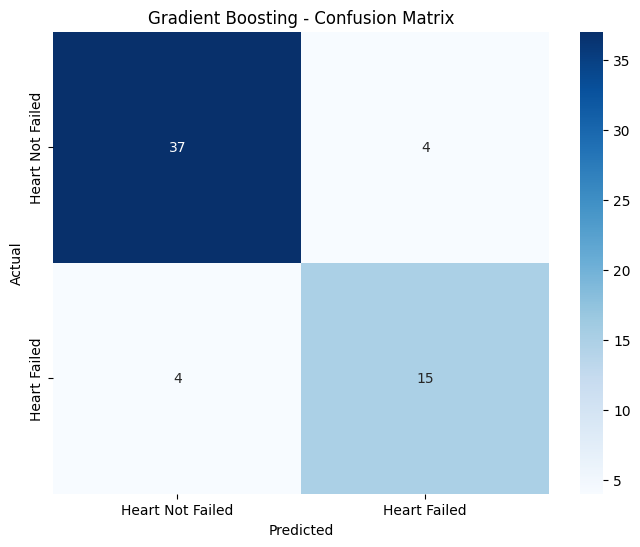

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize base estimator for AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost Classifier
# Initialize AdaBoost Classifier
ada = AdaBoostClassifier(estimator=base_estimator)

# Define the parameter grid for AdaBoost
ada_params = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.5, 1, 1.5]
}

# Use GridSearchCV for hyperparameter tuning
ada_grid = GridSearchCV(ada, ada_params, cv=5, n_jobs=-1, verbose=2)
ada_grid.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_ada = ada_grid.best_estimator_

# Train the AdaBoost model with the best parameters
best_ada.fit(X_train, y_train)

# Make predictions
y_pred = best_ada.predict(X_test)

# Evaluate the model
ada_accuracy = accuracy_score(y_test, y_pred)
print("Optimized AdaBoost Model Accuracy: ", "{:.2f}%".format(100 * ada_accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix for the AdaBoost Model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Optimized AdaBoost - Confusion Matrix")
plt.show()

# Experiment with Gradient Boosting Classifier as well
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Model Accuracy: ", "{:.2f}%".format(100 * gb_accuracy))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

# Confusion Matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns





In [ ]:
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']


In [ ]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)



In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
rf = RandomForestClassifier(random_state=42)

# Define a wider parameter grid for GridSearchCV
rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2']  # Added to explore different feature selections
}


In [ ]:
rf_grid = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=2)
rf_grid.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_rf = rf_grid.best_estimator_


Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1800 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1051 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

In [ ]:

best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
print("Optimized Random Forest Model Accuracy: ", "{:.2f}%".format(100 * rf_accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))


Optimized Random Forest Model Accuracy:  89.02%
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.90      0.88      0.89        41

    accuracy                           0.89        82
   macro avg       0.89      0.89      0.89        82
weighted avg       0.89      0.89      0.89        82



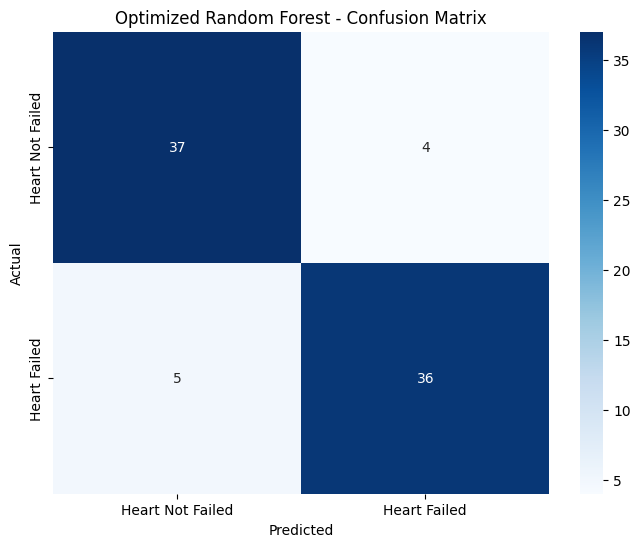

Gradient Boosting Model Accuracy:  89.02%
Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.90      0.88      0.89        41

    accuracy                           0.89        82
   macro avg       0.89      0.89      0.89        82
weighted avg       0.89      0.89      0.89        82



In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Optimized Random Forest - Confusion Matrix")
plt.show()

# Consider also using another model for comparison
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate Gradient Boosting
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Model Accuracy: ", "{:.2f}%".format(100 * gb_accuracy))
print("Classification Report for Gradient Boosting:\n", classification_report(y_test, y_pred_gb))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Optimized XGBoost Model Accuracy:  76.67%
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        35
           1       0.79      0.60      0.68        25

    accuracy                           0.77        60
   macro avg       0.77      0.74      0.75        60
weighted avg       0.77      0.77      0.76        60



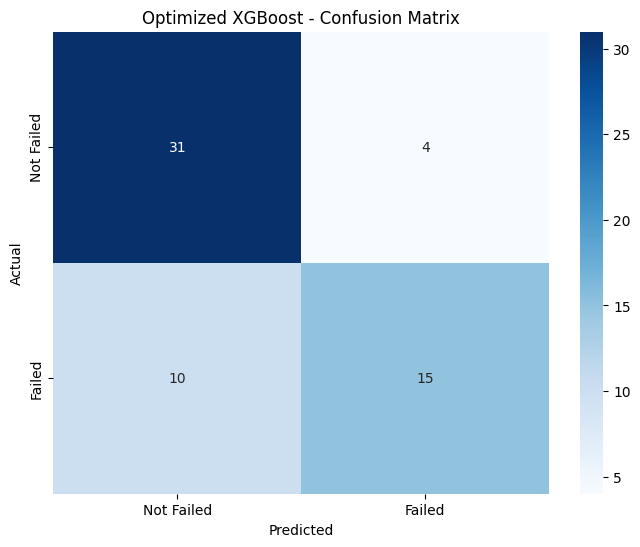

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the parameter grid for GridSearchCV
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Use GridSearchCV for hyperparameter tuning
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, n_jobs=-1, verbose=2)
xgb_grid.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_xgb = xgb_grid.best_estimator_

# Train the XGBoost model with the best parameters
best_xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("Optimized XGBoost Model Accuracy: ", "{:.2f}%".format(100 * xgb_accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix for the XGBoost Model
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Failed", "Failed"], yticklabels=["Not Failed", "Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Optimized XGBoost - Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import numpy as np

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define an extended parameter grid for RandomizedSearchCV
rf_params = {
    'n_estimators': np.arange(50, 1001, 50),  # 50 to 1000
    'max_depth': [None] + list(np.arange(10, 101, 10)),  # 10 to 100
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use RandomizedSearchCV for hyperparameter tuning
rf_random = RandomizedSearchCV(rf, rf_params, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
rf_random.fit(X_train_resampled, y_train_resampled)

# Get the best model after RandomizedSearchCV
best_rf = rf_random.best_estimator_

# Train the RandomForest model with the best parameters
best_rf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
print("Optimized Random Forest Model Accuracy: ", "{:.2f}%".format(100 * rf_accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
125 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Optimized Random Forest Model Accuracy:  93.33%
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.93      0.82      0.88        17

    accuracy                           0.93        60
   macro avg       0.93      0.90      0.91        60
weighted avg       0.93      0.93      0.93        60



Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
165 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Optimized Random Forest Model Accuracy:  93.33%
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.93      0.82      0.88        17

    accuracy                           0.93        60
   macro avg       0.93      0.90      0.91        60
weighted avg       0.93      0.93      0.93        60



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:39:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy:  96.67%
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.88      0.94        17

    accuracy                           0.97        60
   macro avg       0.98      0.94      0.96        60
weighted avg       0.97      0.97      0.97        60



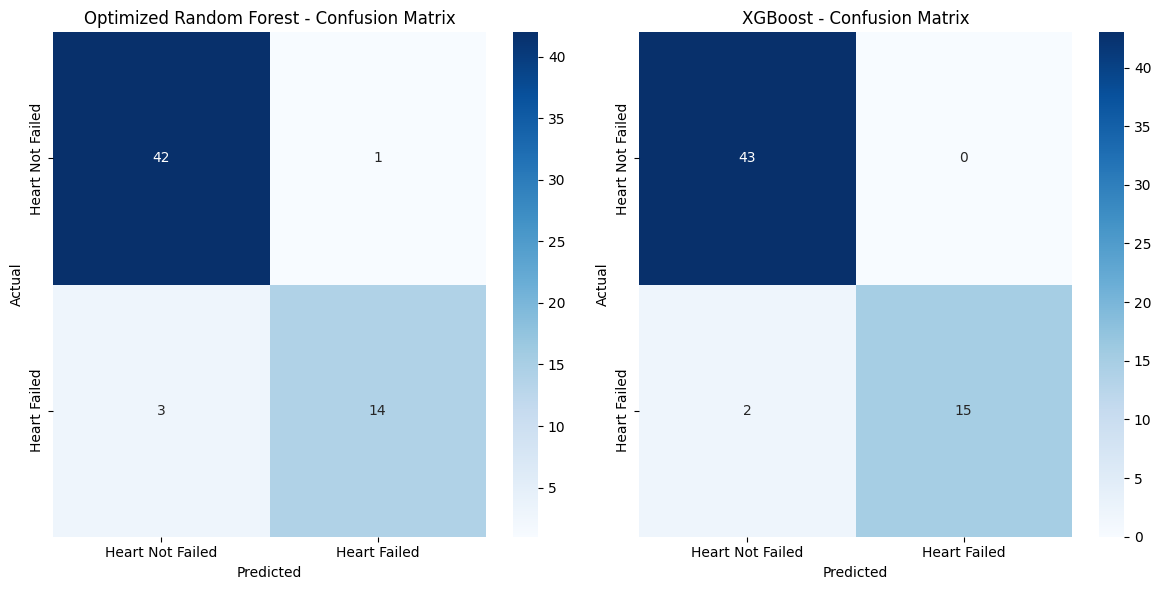

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE for handling class imbalance
import numpy as np
import xgboost as xgb

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define an extended parameter grid for RandomizedSearchCV for RandomForest
rf_params = {
    'n_estimators': np.arange(100, 1101, 100),  # Higher range of estimators
    'max_depth': [None] + list(np.arange(10, 101, 10)),  # Increased depth options
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 0.5]  # Explore feature sampling
}

# Use RandomizedSearchCV for hyperparameter tuning
rf_random = RandomizedSearchCV(rf, rf_params, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
rf_random.fit(X_train_resampled, y_train_resampled)

# Get the best model after RandomizedSearchCV for RandomForest
best_rf = rf_random.best_estimator_

# Train the RandomForest model with the best parameters
best_rf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_rf = best_rf.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Optimized Random Forest Model Accuracy: ", "{:.2f}%".format(100 * rf_accuracy))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Model Accuracy: ", "{:.2f}%".format(100 * xgb_accuracy))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix for Random Forest Model
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Optimized Random Forest - Confusion Matrix")

# Confusion Matrix for XGBoost Model
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.subplot(1, 2, 2)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("XGBoost - Confusion Matrix")

plt.tight_layout()
plt.show()


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
115 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1531, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f


Optimized XGBoost Model Accuracy:  93.33%
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.88      0.88      0.88        17

    accuracy                           0.93        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.93      0.93      0.93        60



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:48:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy:  96.67%
Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.88      0.94        17

    accuracy                           0.97        60
   macro avg       0.98      0.94      0.96        60
weighted avg       0.97      0.97      0.97        60



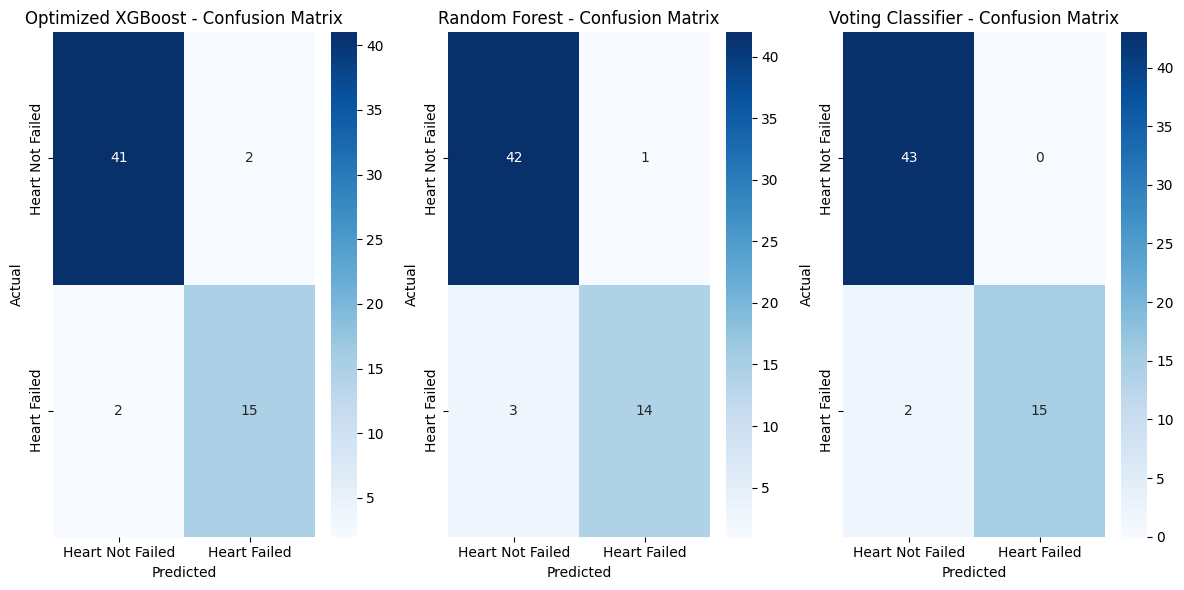

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE for handling class imbalance
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Define the parameter grid for RandomizedSearchCV for XGBoost
xgb_params = {
    'n_estimators': np.arange(100, 1201, 100),  # Higher range of estimators
    'max_depth': np.arange(3, 15, 1),  # Depth options
    'learning_rate': np.round(np.arange(0.01, 0.3, 0.01), 2),  # Learning rates
    'subsample': np.round(np.arange(0.5, 1.1, 0.1), 1),  # Subsampling
    'colsample_bytree': np.round(np.arange(0.5, 1.1, 0.1), 1),  # Column subsampling
    'gamma': np.round(np.arange(0, 5, 0.5), 1),  # Minimum loss reduction required to make a further partition
    'scale_pos_weight': [1, 5, 10]  # Adjust class weights
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Use StratifiedKFold for better evaluation
cv = StratifiedKFold(n_splits=5)

# Use RandomizedSearchCV for hyperparameter tuning
xgb_random = RandomizedSearchCV(xgb_model, xgb_params, n_iter=100, cv=cv, n_jobs=-1, verbose=2, random_state=42)
xgb_random.fit(X_train_resampled, y_train_resampled)

# Get the best model after RandomizedSearchCV for XGBoost
best_xgb = xgb_random.best_estimator_

# Make predictions
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("Optimized XGBoost Model Accuracy: ", "{:.2f}%".format(100 * xgb_accuracy))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions for Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[('xgb', best_xgb), ('rf', rf_model)], voting='soft')
voting_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions with the Voting Classifier
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the Voting Classifier
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print("Voting Classifier Accuracy: ", "{:.2f}%".format(100 * voting_accuracy))
print("Voting Classifier Classification Report:\n", classification_report(y_test, y_pred_voting))

# Confusion Matrix for XGBoost Model
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Optimized XGBoost - Confusion Matrix")

# Confusion Matrix for Random Forest Model
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.subplot(1, 3, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Random Forest - Confusion Matrix")

# Confusion Matrix for Voting Classifier
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.subplot(1, 3, 3)
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Voting Classifier - Confusion Matrix")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:56:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:56:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:56:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking Classifier Accuracy:  95.00%
Stacking Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.82      0.90        17

    accuracy                           0.95        60
   macro avg       0.97      0.91      0.93        60
weighted avg       0.95      0.95      0.95        60



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:56:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy:  90.00%
Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.87      0.76      0.81        17

    accuracy                           0.90        60
   macro avg       0.89      0.86      0.87        60
weighted avg       0.90      0.90      0.90        60



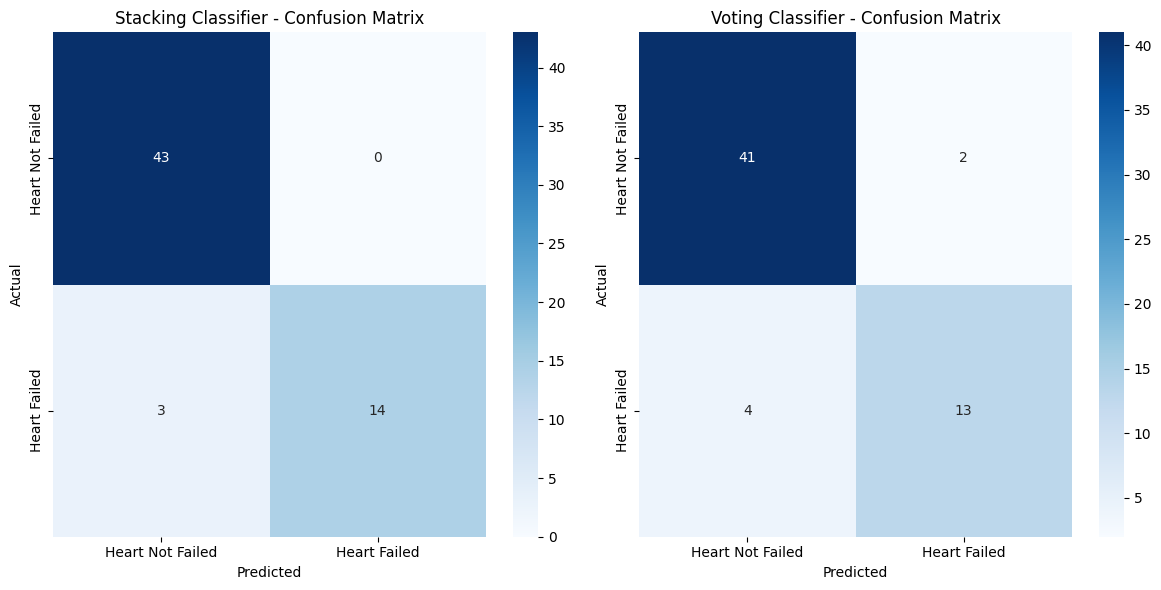

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Initialize and train the individual classifiers
# XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Support Vector Classifier
svc_model = SVC(probability=True, random_state=42)  # Set probability=True for soft voting
svc_model.fit(X_train_resampled, y_train_resampled)

# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default n_neighbors
knn_model.fit(X_train_resampled, y_train_resampled)

# Create a Stacking Classifier
base_estimators = [
    ('xgb', xgb_model),
    ('rf', rf_model),
    ('svc', svc_model),
    ('knn', knn_model)
]

stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions with the Stacking Classifier
y_pred_stacking = stacking_clf.predict(X_test)

# Evaluate the Stacking Classifier
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print("Stacking Classifier Accuracy: ", "{:.2f}%".format(100 * stacking_accuracy))
print("Stacking Classifier Classification Report:\n", classification_report(y_test, y_pred_stacking))

# Create a Voting Classifier (optional for further ensemble)
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb_model),
    ('rf', rf_model),
    ('svc', svc_model),
    ('knn', knn_model)
], voting='soft')

voting_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions with the Voting Classifier
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the Voting Classifier
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print("Voting Classifier Accuracy: ", "{:.2f}%".format(100 * voting_accuracy))
print("Voting Classifier Classification Report:\n", classification_report(y_test, y_pred_voting))

# Confusion Matrix for Stacking Classifier
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Stacking Classifier - Confusion Matrix")

# Confusion Matrix for Voting Classifier
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.subplot(1, 2, 2)
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Voting Classifier - Confusion Matrix")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:00:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:00:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:00:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking Classifier Accuracy:  95.00%
Stacking Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.82      0.90        17

    accuracy                           0.95        60
   macro avg       0.97      0.91      0.93        60
weighted avg       0.95      0.95      0.95        60



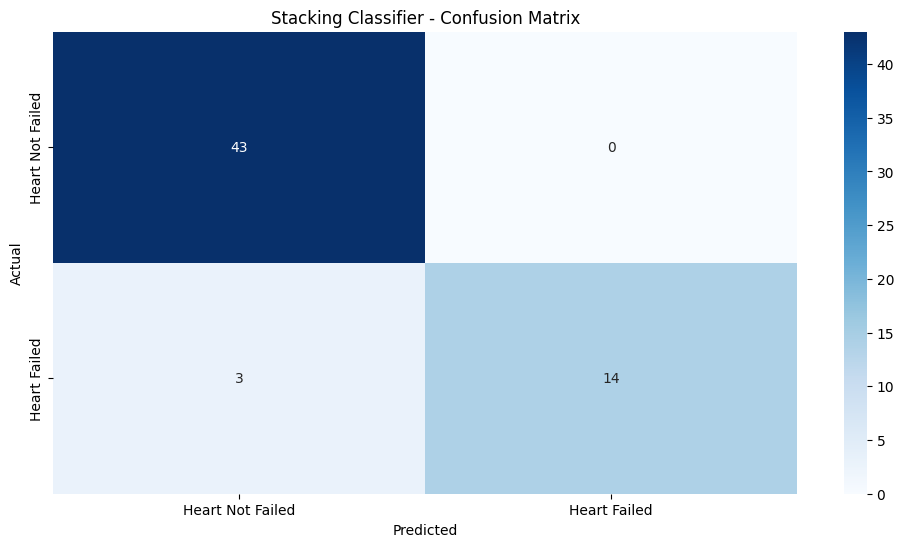

In [ ]:
# Additional imports for feature engineering and more models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Create additional classifiers
svm_model = SVC(probability=True, random_state=42)
knn_model = KNeighborsClassifier()
gb_model = GradientBoostingClassifier(random_state=42)

# Define the new list of estimators for stacking
estimators = [
    ('xgb', best_xgb),
    ('rf', rf_model),
    ('svm', svm_model),
    ('knn', knn_model),
    ('gb', gb_model)
]

# Initialize Stacking Classifier with logistic regression as the final estimator
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the Stacking Classifier
stacking_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions with the Stacking Classifier
y_pred_stacking = stacking_clf.predict(X_test)

# Evaluate the Stacking Classifier
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print("Stacking Classifier Accuracy: ", "{:.2f}%".format(100 * stacking_accuracy))
print("Stacking Classifier Classification Report:\n", classification_report(y_test, y_pred_stacking))

# Confusion Matrix for Stacking Classifier
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(12, 6))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Stacking Classifier - Confusion Matrix")
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:04:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy:  96.67%
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.88      0.94        17

    accuracy                           0.97        60
   macro avg       0.98      0.94      0.96        60
weighted avg       0.97      0.97      0.97        60

[LightGBM] [Info] Number of positive: 160, number of negative: 160
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 425
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:04:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 160, number of negative: 160
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 425
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:04:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 160, number of negative: 160
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 425
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:04:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 128, number of negative: 128
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 256, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

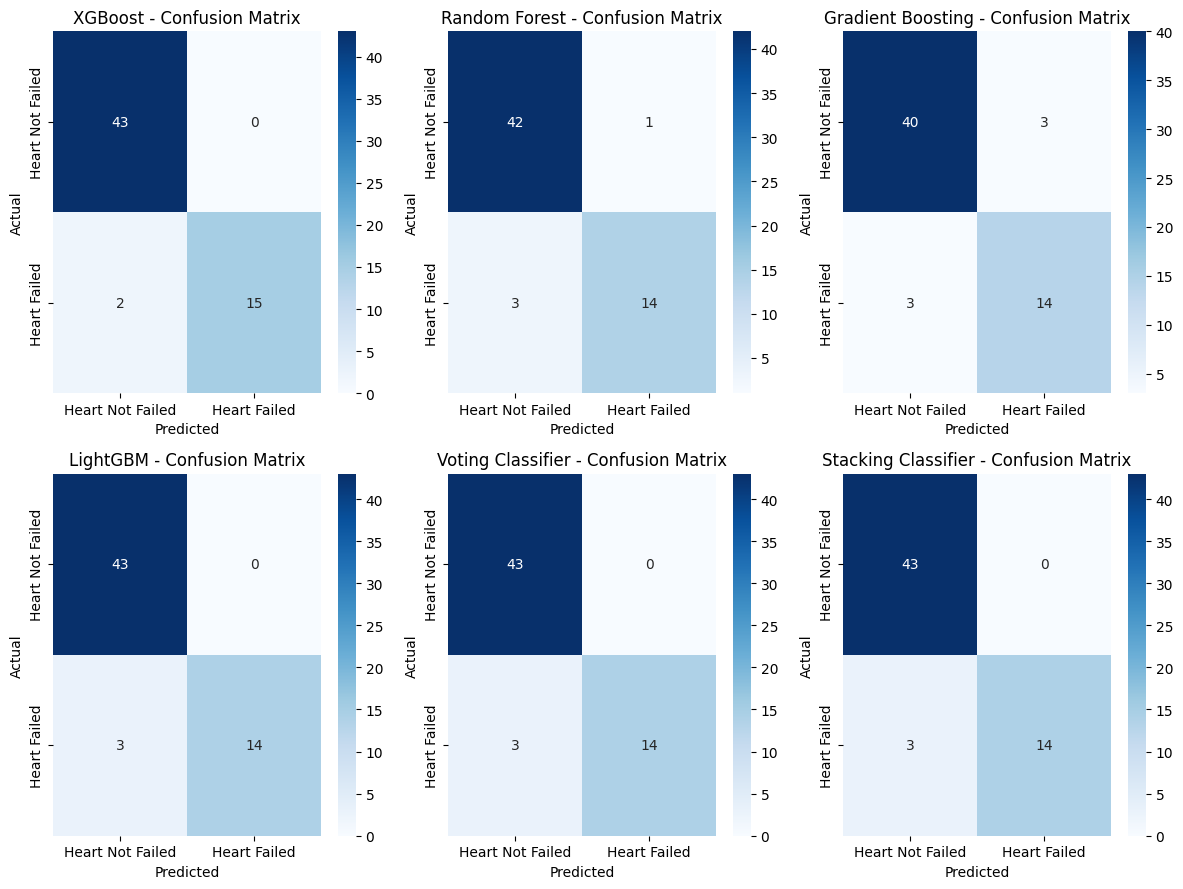

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE for handling class imbalance
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Model Accuracy: ", "{:.2f}%".format(100 * xgb_accuracy))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test)

# Initialize and train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)
y_pred_gb = gb_model.predict(X_test)

# Initialize and train LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_lgb = lgb_model.predict(X_test)

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb_model),
    ('rf', rf_model),
    ('gb', gb_model),
    ('lgb', lgb_model)
], voting='soft')
voting_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions with the Voting Classifier
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the Voting Classifier
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print("Voting Classifier Accuracy: ", "{:.2f}%".format(100 * voting_accuracy))
print("Voting Classifier Classification Report:\n", classification_report(y_test, y_pred_voting))

# Create a Stacking Classifier
stacking_clf = StackingClassifier(estimators=[
    ('xgb', xgb_model),
    ('rf', rf_model),
    ('gb', gb_model),
    ('lgb', lgb_model)
], final_estimator=LogisticRegression())
stacking_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions with the Stacking Classifier
y_pred_stacking = stacking_clf.predict(X_test)

# Evaluate the Stacking Classifier
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print("Stacking Classifier Accuracy: ", "{:.2f}%".format(100 * stacking_accuracy))
print("Stacking Classifier Classification Report:\n", classification_report(y_test, y_pred_stacking))

# Confusion Matrix for XGBoost Model
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(12, 9))

plt.subplot(2, 3, 1)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("XGBoost - Confusion Matrix")

# Confusion Matrix for Random Forest Model
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.subplot(2, 3, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Random Forest - Confusion Matrix")

# Confusion Matrix for Gradient Boosting Model
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.subplot(2, 3, 3)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Gradient Boosting - Confusion Matrix")

# Confusion Matrix for LightGBM Model
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
plt.subplot(2, 3, 4)
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("LightGBM - Confusion Matrix")

# Confusion Matrix for Voting Classifier
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.subplot(2, 3, 5)
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Voting Classifier - Confusion Matrix")

# Confusion Matrix for Stacking Classifier
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.subplot(2, 3, 6)
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Stacking Classifier - Confusion Matrix")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:09:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 160, number of negative: 160
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 425
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:09:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 160, number of negative: 160
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 425
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

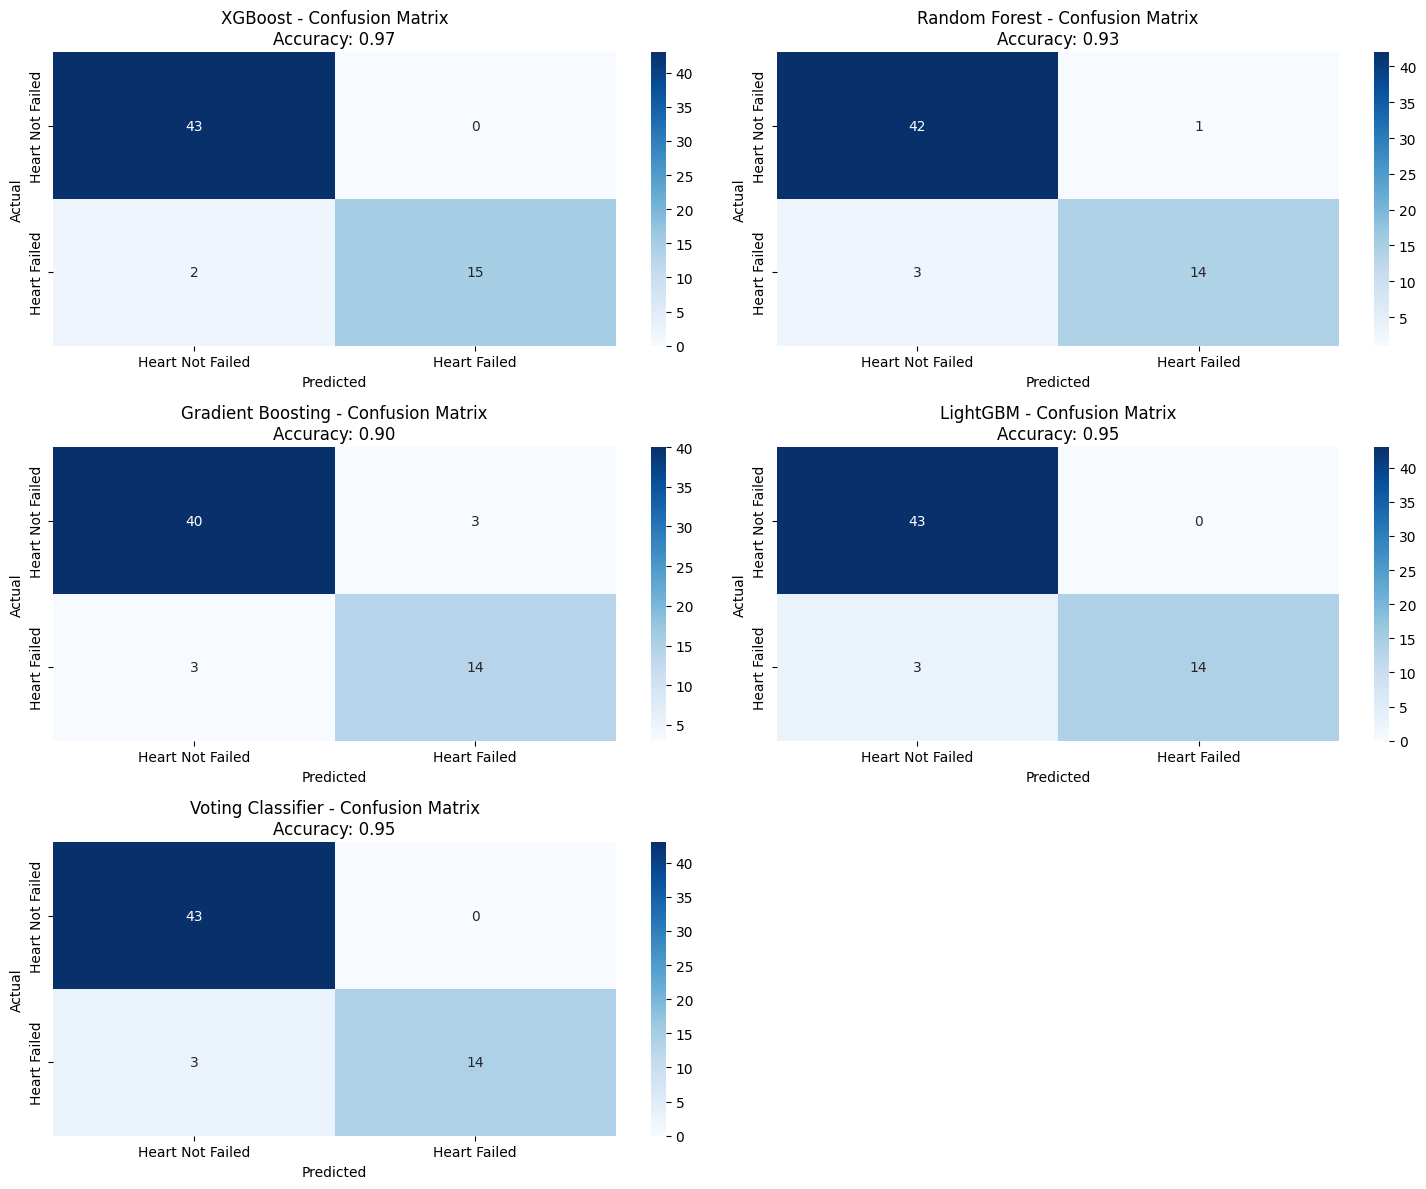

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.88      0.94        17

    accuracy                           0.97        60
   macro avg       0.98      0.94      0.96        60
weighted avg       0.97      0.97      0.97        60

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.93      0.82      0.88        17

    accuracy                           0.93        60
   macro avg       0.93      0.90      0.91        60
weighted avg       0.93      0.93      0.93        60

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.82      0.82      0.82        17

    accuracy                           0.90        60
   macro avg    

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE for handling class imbalance
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# Train and predict using each model
predictions = {}
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='soft')
voting_clf.fit(X_train_resampled, y_train_resampled)
y_pred_voting = voting_clf.predict(X_test)
predictions['Voting Classifier'] = y_pred_voting

# Calculate accuracy for each model and store it
accuracies = {model_name: accuracy_score(y_test, y_pred) for model_name, y_pred in predictions.items()}

# Confusion Matrix for each model
plt.figure(figsize=(15, 12))
for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(3, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f"{model_name} - Confusion Matrix\nAccuracy: {accuracies[model_name]:.2f}")

plt.tight_layout()
plt.show()

# Print classification reports for each model
for model_name, y_pred in predictions.items():
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:14:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


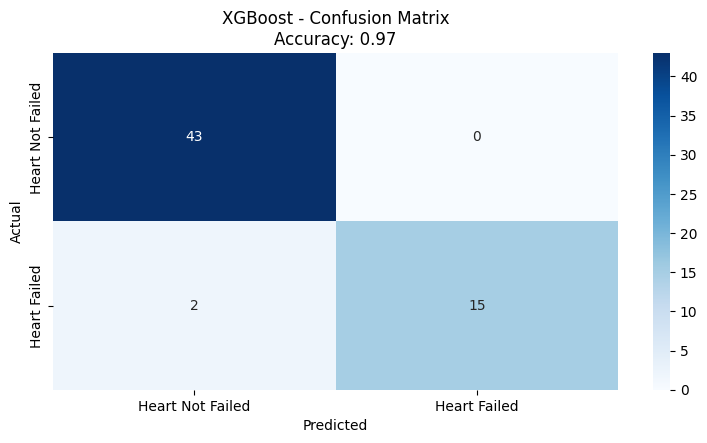

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.88      0.94        17

    accuracy                           0.97        60
   macro avg       0.98      0.94      0.96        60
weighted avg       0.97      0.97      0.97        60



In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Load dataset
heart_data = pd.read_csv('data.csv')

# Specify features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
            'smoking', 'time']
X = heart_data[features]
y = heart_data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    #'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    #'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    #'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# Train and predict using each model
predictions = {}
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred



# Calculate accuracy for each model and store it
accuracies = {model_name: accuracy_score(y_test, y_pred) for model_name, y_pred in predictions.items()}

# Confusion Matrix for each model
plt.figure(figsize=(15, 12))
for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(3, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Heart Not Failed", "Heart Failed"], yticklabels=["Heart Not Failed", "Heart Failed"])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f"{model_name} - Confusion Matrix\nAccuracy: {accuracies[model_name]:.2f}")

plt.tight_layout()
plt.show()

# Print classification reports for each model
for model_name, y_pred in predictions.items():
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))
